#### Import necessary library

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#import cifar10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [3]:
y_train.shape

(50000, 1)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_test.shape

(10000, 1)

In [6]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [7]:
y_train = y_train.reshape(-1,)
y_train[:4]

array([6, 9, 9, 4], dtype=uint8)

In [8]:
# Classify 10 types of data sets.
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
classes[9]

'truck'

## Data Visualization

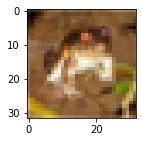

In [10]:
plt.figure(figsize = (15,2))
plt.imshow(x_train[0])

In [11]:
def plot_sample(x,y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

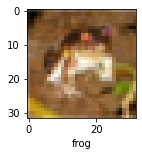

In [12]:
plot_sample(x_train,y_train,0)

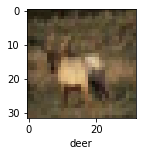

In [13]:
plot_sample(x_train,y_train,3)

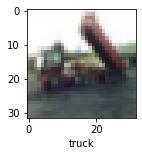

In [14]:
plot_sample(x_train,y_train,2)

### Data scaling

In [15]:
x_train = x_train/255
x_test = x_test/255

In [16]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [17]:
x_test

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

### Build a ANN(Artificial Neural Network)

In [18]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10,   activation='sigmoid')
])

ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

ann.fit(x_train,y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 142s 88ms/step - loss: 1.8124 - accuracy: 0.3548
Epoch 2/5
1563/1563 [==============================] - 131s 84ms/step - loss: 1.6244 - accuracy: 0.4264
Epoch 3/5
1563/1563 [==============================] - 180s 115ms/step - loss: 1.5415 - accuracy: 0.4585
Epoch 4/5
1563/1563 [==============================] - 142s 91ms/step - loss: 1.4816 - accuracy: 0.4775
Epoch 5/5
1563/1563 [==============================] - 154s 99ms/step - loss: 1.4333 - accuracy: 0.4964


## Evaluation of that model!

In [19]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 11s 25ms/step - loss: 1.5125 - accuracy: 0.4580


[1.5125248432159424, 0.4580000042915344]

### Showing Precision, recall and f1-score!!

In [21]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.46      0.52      1000
           1       0.35      0.85      0.50      1000
           2       0.42      0.25      0.31      1000
           3       0.47      0.16      0.24      1000
           4       0.39      0.46      0.42      1000
           5       0.40      0.39      0.40      1000
           6       0.61      0.41      0.49      1000
           7       0.47      0.61      0.53      1000
           8       0.59      0.58      0.59      1000
           9       0.53      0.40      0.46      1000

    accuracy                           0.46     10000
   macro avg       0.48      0.46      0.45     10000
weighted avg       0.48      0.46      0.45     10000



## CNN model and Comperison between CNN and ANN

In [23]:
cnn = models.Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [1]:
#the reason we have use sparse_categorical_crossentropy as loss function is the output of this model is 10 different item not within 0 or 1.
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

NameError: name 'cnn' is not defined

In [26]:
cnn.fit(x_train,y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 75s 43ms/step - loss: 1.4639 - accuracy: 0.4749
Epoch 2/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.1218 - accuracy: 0.6058
Epoch 3/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9905 - accuracy: 0.6559
Epoch 4/10
1563/1563 [==============================] - 88s 56ms/step - loss: 0.9107 - accuracy: 0.6825
Epoch 5/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.8484 - accuracy: 0.7065
Epoch 6/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.7954 - accuracy: 0.7237
Epoch 7/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.7471 - accuracy: 0.7377
Epoch 8/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.7060 - accuracy: 0.7541
Epoch 9/10
1563/1563 [==============================] - 88s 56ms/step - loss: 0.6682 - accuracy: 0.7663
Epoch 10/10
1563/1563 [==============================] - 88s 56m

In [2]:
#CNN result evaluation!!
cnn.evaluate(x_test,y_test)

NameError: name 'cnn' is not defined

# Result Cross check!!!

In [28]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

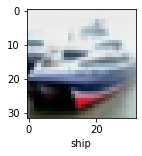

In [29]:
plot_sample(x_test,y_test,1)

### Prediction Time

In [30]:
y_pred = cnn.predict(x_test)
y_pred[:5]

array([[8.02835159e-04, 6.36964338e-04, 3.54492781e-03, 9.02509451e-01,
        9.53693176e-04, 1.52946105e-02, 5.55150695e-02, 8.00006892e-05,
        2.04914678e-02, 1.70970641e-04],
       [1.54765008e-03, 1.62046850e-01, 1.17398478e-07, 1.72170559e-07,
        3.85925567e-08, 1.11312626e-09, 1.48872648e-09, 2.42692666e-09,
        8.34406316e-01, 1.99879333e-03],
       [2.28833228e-01, 6.76498339e-02, 1.34211290e-03, 1.60192605e-02,
        2.49221455e-03, 4.76516056e-04, 1.19180151e-03, 2.64246692e-03,
        6.45990670e-01, 3.33619155e-02],
       [7.63550282e-01, 6.48346147e-04, 2.27980409e-02, 4.96037013e-04,
        5.86821139e-02, 2.66973234e-06, 2.01376178e-03, 2.16177305e-05,
        1.51266679e-01, 5.20541333e-04],
       [2.95630230e-07, 5.35861147e-07, 4.66034329e-03, 5.59637994e-02,
        2.24577993e-01, 4.21536760e-03, 7.10565984e-01, 5.73593707e-06,
        9.80026016e-06, 1.00518783e-07]], dtype=float32)

In [31]:
np.argmax([5,12,1,2])

1

In [33]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

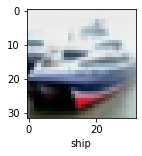

In [34]:
plot_sample(x_test, y_test,1)

In [35]:
classes[y_classes[1]]

'ship'

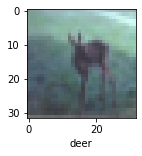

In [36]:
plot_sample(x_test, y_test,555)

In [37]:
classes[y_classes[555]]

'deer'

In [39]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.78      0.72      1000
           1       0.82      0.79      0.81      1000
           2       0.52      0.63      0.57      1000
           3       0.54      0.52      0.53      1000
           4       0.61      0.70      0.65      1000
           5       0.76      0.46      0.57      1000
           6       0.77      0.79      0.78      1000
           7       0.78      0.73      0.76      1000
           8       0.79      0.81      0.80      1000
           9       0.79      0.76      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

